In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt
import pandas as pd

## Cross-validation

### Example based on k-NN classifier with fruit dataset (2 features)

In [10]:
fruits = pd.read_table('C:/Users/MAURICIO/Desktop/fruit_data_with_colors.txt')

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

C:\Users\MAURICIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [11]:
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y, cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.8        0.75       0.84210526]
Mean cross-validation score (3-fold): 0.797


C:\Users\MAURICIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\MAURICIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Validation curve example

In [12]:
param_range = np.logspace(-3, 3, 4)

In [13]:
train_scores, test_scores = validation_curve(SVC(), X, y, param_name='gamma', param_range=param_range, cv=3)

In [14]:
print(train_scores)

[[0.46153846 0.43589744 0.425     ]
 [0.84615385 0.71794872 0.75      ]
 [0.92307692 0.8974359  0.925     ]
 [1.         1.         0.975     ]]


In [15]:
print(test_scores)

[[0.5        0.3        0.31578947]
 [0.85       0.7        0.63157895]
 [0.55       0.85       0.68421053]
 [0.4        0.2        0.36842105]]


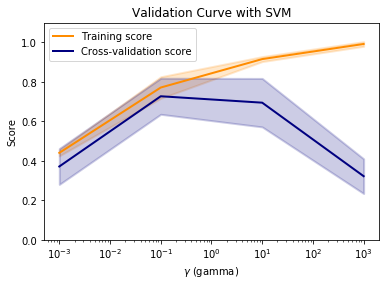

In [16]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()